# Food Requirement Analysis

## Data preprocessing

## Import libraries 

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Merge datasets

In [2]:
data1=pd.read_csv("Food-demand.csv")

In [3]:
data2=pd.read_csv("fulfilment_center_info.csv")

In [4]:
data3=pd.read_csv("meal_info.csv")

In [5]:
dataset = data3.merge(data1)

In [6]:
dataset=data2.merge(dataset)

In [7]:
dataset

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1103215,1,136.83,136.83,0,0,959
1,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1091356,2,133.86,135.86,0,0,1054
2,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1195933,3,135.86,133.86,0,0,891
3,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1425602,4,134.86,135.86,0,0,1107
4,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1249127,5,146.53,146.53,0,0,919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1308117,141,728.53,727.53,0,0,27
456544,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1467391,142,728.53,728.53,0,0,40
456545,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1472391,143,485.03,727.53,0,1,204
456546,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1001628,144,484.03,728.53,1,1,337


In [8]:
dataset.head()

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1103215,1,136.83,136.83,0,0,959
1,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1091356,2,133.86,135.86,0,0,1054
2,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1195933,3,135.86,133.86,0,0,891
3,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1425602,4,134.86,135.86,0,0,1107
4,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1249127,5,146.53,146.53,0,0,919


In [9]:
dataset.describe()

,center_id,city_code,region_code,op_area,meal_id,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,82.105796,601.553399,56.614566,4.083590,2024.337458,1.250096e+06,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760
std,45.975046,66.195914,17.641306,1.091686,547.420920,1.443548e+05,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798
min,10.000000,456.000000,23.000000,0.900000,1062.000000,1.000000e+06,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,43.000000,553.000000,34.000000,3.600000,1558.000000,1.124999e+06,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,76.000000,596.000000,56.000000,4.000000,1993.000000,1.250184e+06,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,110.000000,651.000000,77.000000,4.500000,2539.000000,1.375140e+06,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,186.000000,713.000000,93.000000,7.000000,2956.000000,1.499999e+06,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
center_id                456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
meal_id                  456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
id                       456548 non-null int64
week                     456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


## Finding missing values

In [11]:
dataset.isnull().any()

center_id                False
city_code                False
region_code              False
center_type              False
op_area                  False
meal_id                  False
category                 False
cuisine                  False
id                       False
week                     False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
dtype: bool

In [12]:
dataset

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1103215,1,136.83,136.83,0,0,959
1,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1091356,2,133.86,135.86,0,0,1054
2,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1195933,3,135.86,133.86,0,0,891
3,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1425602,4,134.86,135.86,0,0,1107
4,11,679,56,TYPE_A,3.7,1885,Beverages,Thai,1249127,5,146.53,146.53,0,0,919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1308117,141,728.53,727.53,0,0,27
456544,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1467391,142,728.53,728.53,0,0,40
456545,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1472391,143,485.03,727.53,0,1,204
456546,51,638,56,TYPE_A,7.0,1445,Seafood,Continental,1001628,144,484.03,728.53,1,1,337


## Data visualization

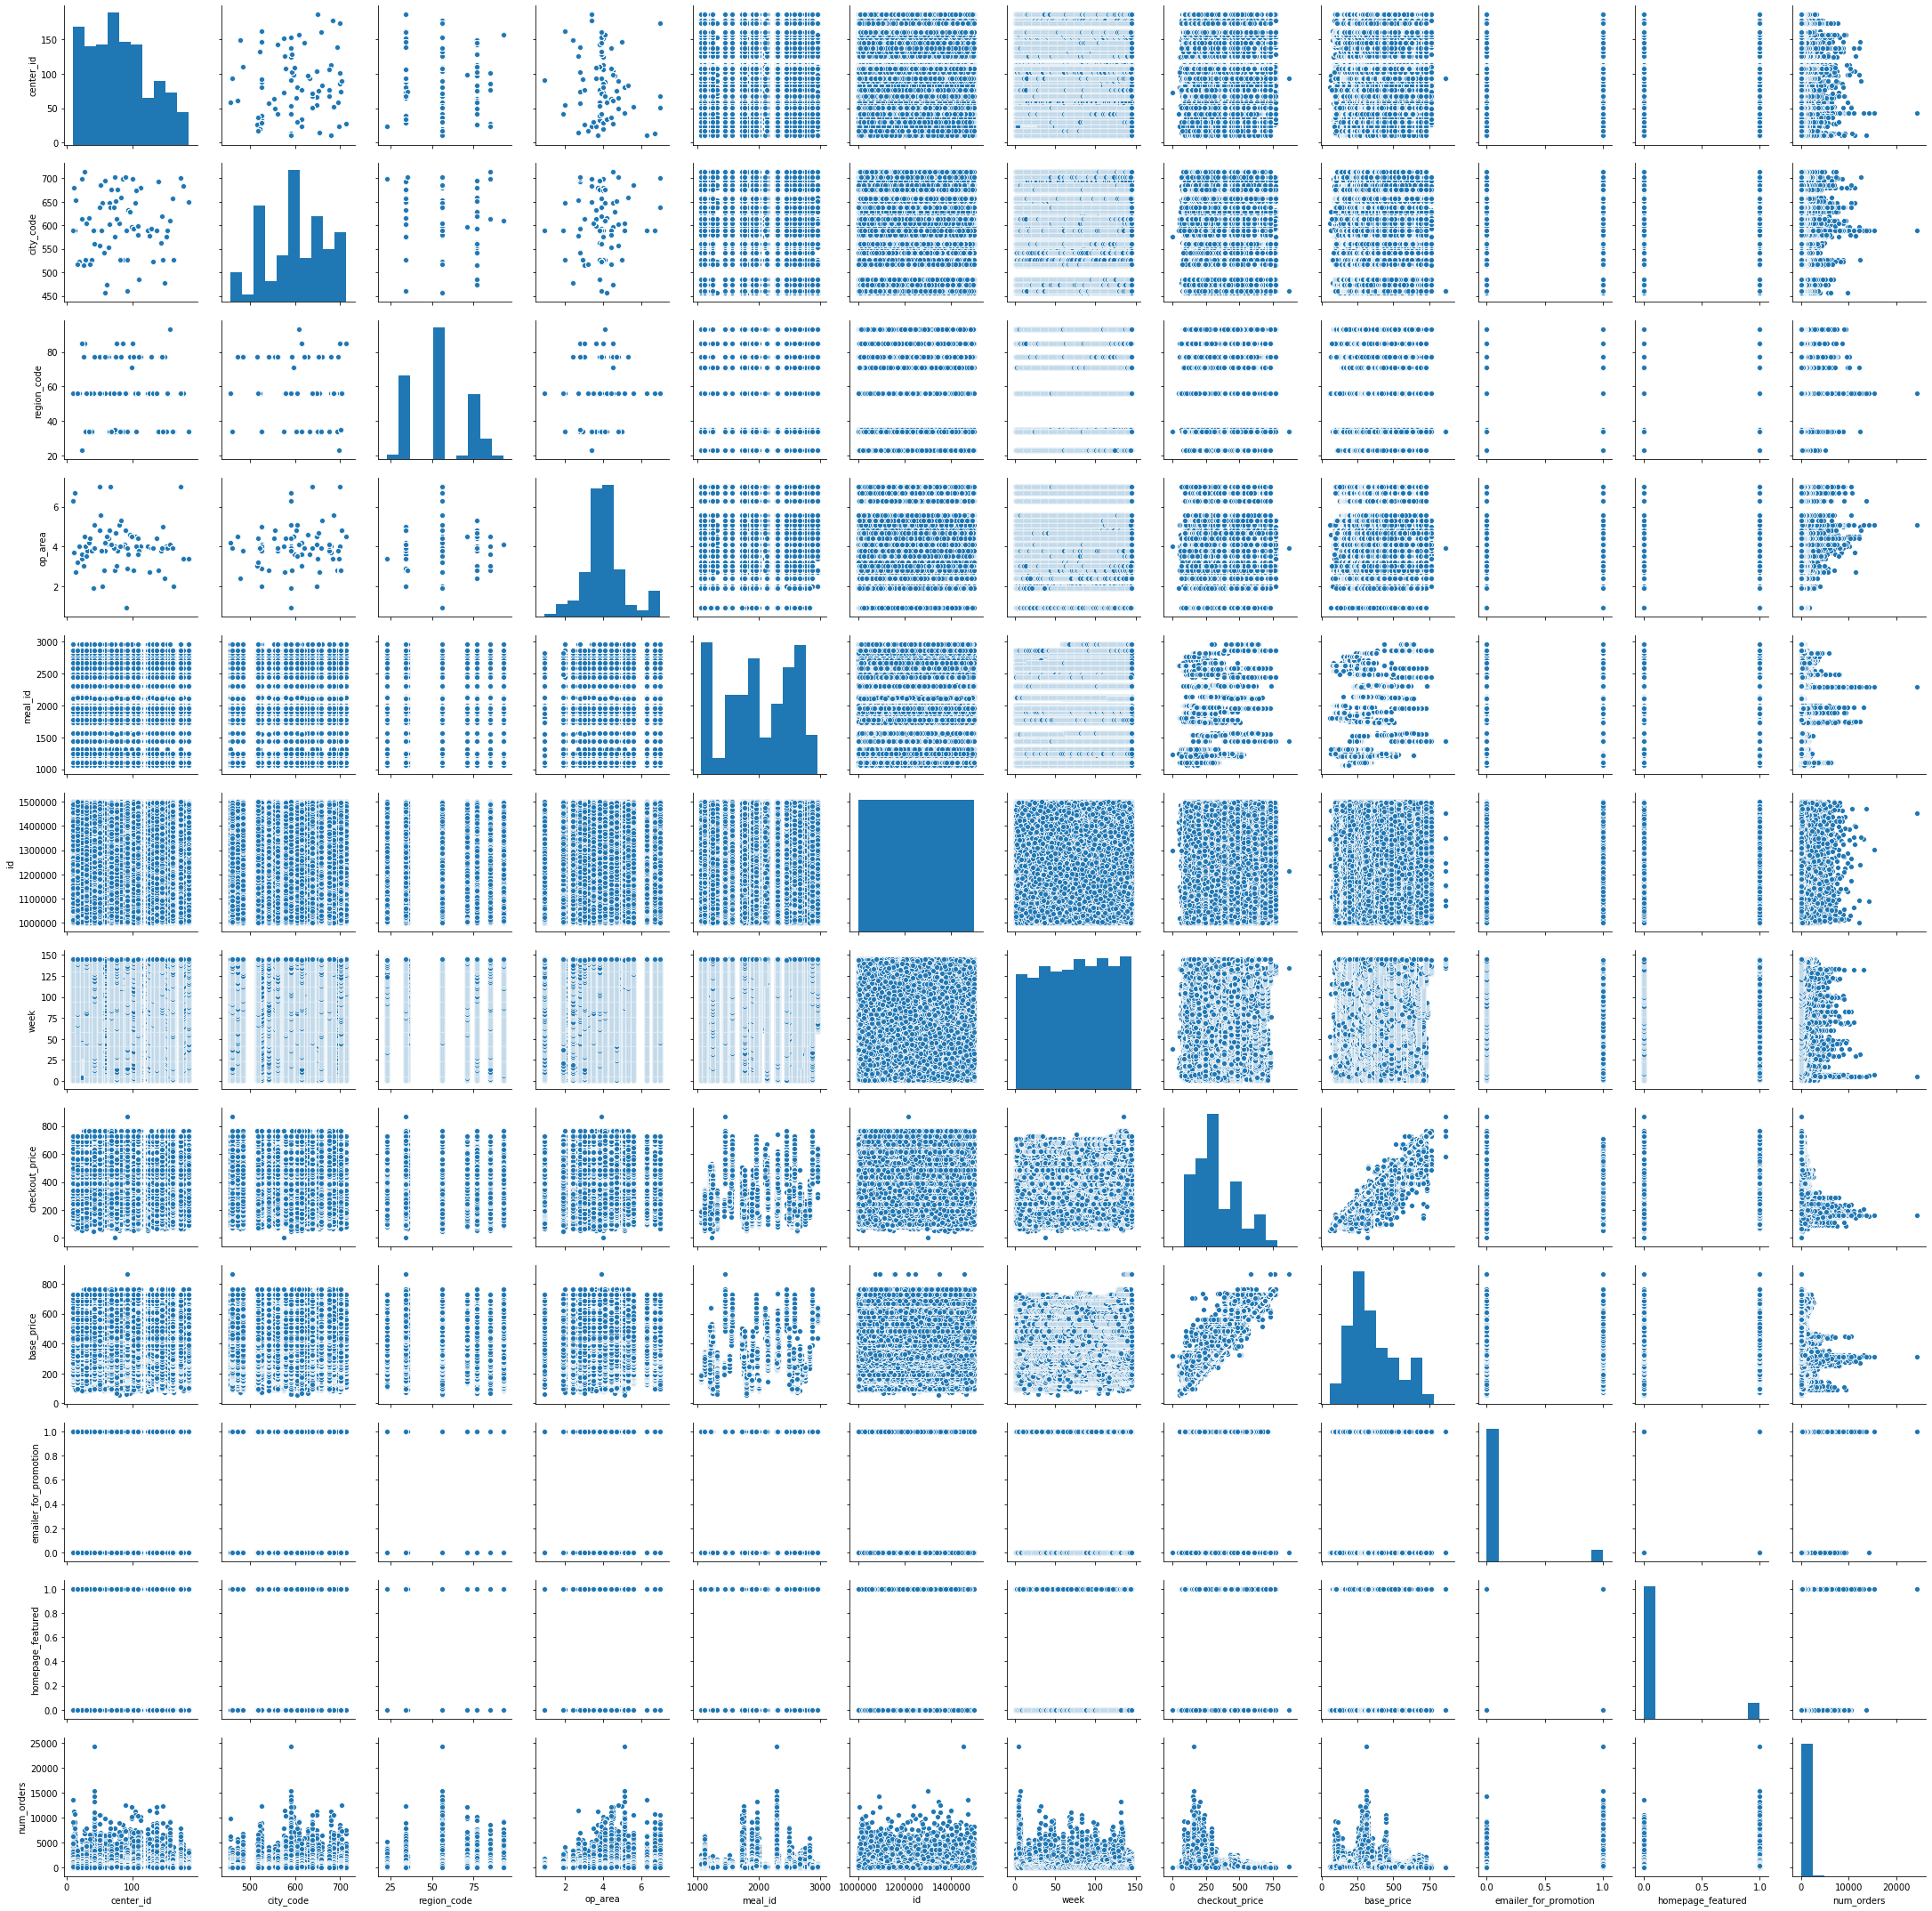

In [13]:
sns.pairplot(dataset)
plt.show()

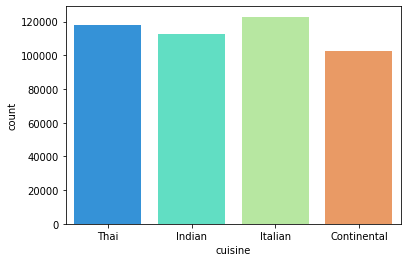

In [14]:
sns.countplot('cuisine',data = dataset, palette = "rainbow")

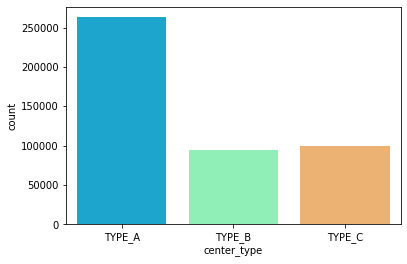

In [15]:
sns.countplot('center_type',data = dataset, palette = "rainbow")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A50A723788>,
      dtype=object)

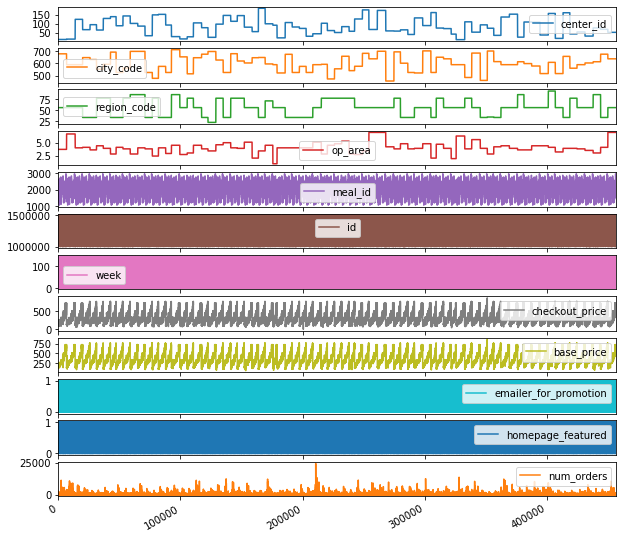

In [16]:
dataset.plot(subplots=True,figsize=(10,10))

## Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['category']=le.fit_transform(dataset['category'])
dataset['center_type']=le.fit_transform(dataset['center_type'])
dataset['cuisine']=le.fit_transform(dataset['cuisine'])

In [18]:
x=dataset.iloc[:,0:14].values
y=dataset.iloc[:,14:15].values

In [19]:
x

array([[ 11.  , 679.  ,  56.  , ..., 136.83,   0.  ,   0.  ],
       [ 11.  , 679.  ,  56.  , ..., 135.86,   0.  ,   0.  ],
       [ 11.  , 679.  ,  56.  , ..., 133.86,   0.  ,   0.  ],
       ...,
       [ 51.  , 638.  ,  56.  , ..., 727.53,   0.  ,   1.  ],
       [ 51.  , 638.  ,  56.  , ..., 728.53,   1.  ,   1.  ],
       [ 51.  , 638.  ,  56.  , ..., 727.53,   0.  ,   0.  ]])

In [20]:
y

array([[ 959],
       [1054],
       [ 891],
       ...,
       [ 204],
       [ 337],
       [  13]], dtype=int64)

In [21]:
x.shape

(456548, 14)

In [22]:
y.shape

(456548, 1)

## One Hot Encoding 

In [23]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,3:4]).toarray()
p=oh.fit_transform(x[:,6:7]).toarray()
q=oh.fit_transform(x[:,7:8]).toarray()
x=np.delete(x,3,axis=1)
x=np.delete(x,6,axis=1)
x=np.delete(x,7,axis=1)
x=np.concatenate((q,p,z,x),axis=1)

C:\Users\mamas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\mamas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [24]:
x.shape

(456548, 32)

## Splitting the dataset 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.1,random_state = 0)

In [26]:
x_train

array([[  0.  ,   0.  ,   1.  , ..., 322.04,   1.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ..., 273.54,   0.  ,   0.  ],
       [  1.  ,   0.  ,   0.  , ..., 608.19,   0.  ,   0.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ..., 150.35,   0.  ,   1.  ],
       [  0.  ,   1.  ,   0.  , ..., 426.86,   0.  ,   0.  ],
       [  0.  ,   0.  ,   1.  , ..., 184.3 ,   0.  ,   0.  ]])

In [27]:
y_train

array([[446],
       [108],
       [ 27],
       ...,
       [188],
       [296],
       [ 80]], dtype=int64)

In [28]:
x_train.shape

(410893, 32)

In [29]:
y_train.shape

(410893, 1)

## Feature Scaling 

In [30]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
predict = reg.predict(x_test)
predict

array([[ 387.69445978],
       [  61.04992853],
       [1132.42297541],
       ...,
       [ 413.13781916],
       [ 448.83801447],
       [ 649.64172541]])

In [33]:
from sklearn.metrics import r2_score
acc1 = r2_score(y_test, predict)
acc1

0.40575601527724503

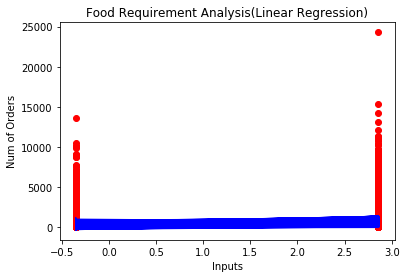

In [34]:
plt.scatter(x_train[:,31],y_train,color = 'red')
plt.plot(x_test[:,31],reg.predict(x_test),color = 'blue')
plt.title('Food Requirement Analysis(Linear Regression)')
plt.xlabel('Inputs')
plt.ylabel('Num of Orders')
plt.show()

## Polynomial Regression 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree =2)
x_poly = polyreg.fit_transform(x_train)
polyreg.fit(x_poly,y_train)
poly = LinearRegression()
poly.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
ylin = poly.predict(polyreg.fit_transform(x_test))

In [37]:
from sklearn.metrics import r2_score
acc2 = r2_score(y_test,ylin)
acc2

0.6290673811909449

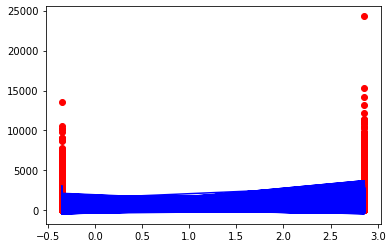

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,31],y_train,color = 'red')
plt.plot(x_test[:,31],poly.predict(polyreg.fit_transform(x_test)),color = 'blue')
plt.show()

## Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
dec1 = DecisionTreeRegressor()
dec1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
y_pred = dec1.predict(x_test)
y_pred

array([ 393.,   28., 1122., ...,  135.,  121.,   41.])

In [41]:
from sklearn.metrics import r2_score
acc = r2_score(y_test, y_pred)
acc

0.6927671813354008

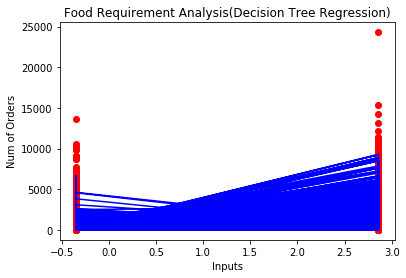

In [42]:
plt.scatter(x_train[:,31],y_train,color = 'red')
plt.plot(x_test[:,31],dec1.predict(x_test),color = 'blue')
plt.title('Food Requirement Analysis(Decision Tree Regression)')
plt.xlabel('Inputs')
plt.ylabel('Num of Orders')
plt.show()

## Random Forest Regressor 

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

C:\Users\mamas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [44]:
randforest = regressor.predict(x_test)
randforest

array([ 581.39,   46.64, 1042.93, ...,  144.91,  110.1 ,  104.31])

In [45]:
from sklearn.metrics import r2_score
acc3 = r2_score(y_test, randforest)
acc3

0.8317683267299506

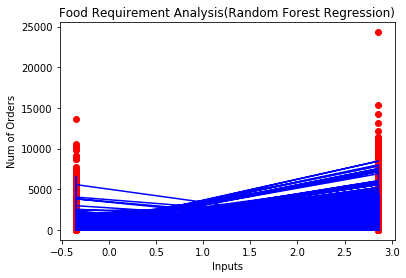

In [46]:
plt.scatter(x_train[:,31],y_train,color = 'red')
plt.plot(x_test[:,31],regressor.predict(x_test),color = 'blue')
plt.title('Food Requirement Analysis(Random Forest Regression)')
plt.xlabel('Inputs')
plt.ylabel('Num of Orders')
plt.show()

## Exporting pickle file 

In [47]:
import pickle
pickle.dump(regressor,open('num_orders.pkl','wb'))